## Finding Anomalies using Isolation Forest

Data: Covid Totals Data from Kaggle.com (https://www.kaggle.com/datasets/uusaif/covidtotals)

Author: Jeffrey V.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

In [3]:
covidTotals = pd.read_csv('covidtotals.csv')
covidTotals.head()

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


In [4]:
covidTotals.set_index("iso_code", inplace=True)

In [6]:
covidTotals.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


## Check for Missing Data

In [7]:
covidTotals.isnull().sum()

lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        12
median_age         24
gdp_per_capita     28
hosp_beds          46
dtype: int64

In [8]:
vars_ = ['location', 'total_cases_pm', 'total_deaths_pm',
         'pop_density', 'median_age', 'gdp_per_capita']

In [9]:
standScale = StandardScaler()

In [11]:
analysis_ = covidTotals.loc[:, vars_].dropna()

In [12]:
# Apply the standard scaler to the dataframe with missing values dropped.
analysis_standScale = standScale.fit_transform(analysis_.iloc[:, 1:])

In [13]:
analysis_standScale

array([[-3.54798127e-01, -3.38797633e-01, -2.35023266e-01,
        -1.31297684e+00, -8.77010446e-01],
       [-3.52648607e-01, -2.96326476e-01, -1.73503538e-01,
         8.20846220e-01, -3.67279351e-01],
       [-4.38967308e-01, -2.66435163e-01, -2.80232931e-01,
        -1.58072607e-01, -2.59699312e-01],
       [-5.39956580e-01, -3.95367641e-01, -2.72255329e-01,
        -1.51096042e+00, -6.72316136e-01],
       [-4.19369162e-01, -1.28990994e-01, -1.86658613e-02,
         1.71900032e-01,  1.26550715e-01],
       [-3.63403844e-01, -2.92319434e-01, -2.81660900e-01,
         1.49901856e-01, -3.79660789e-03],
       [ 9.53717076e-01, -1.04995233e-02, -1.75869259e-01,
         5.67867197e-01, -5.21015202e-01],
       [-8.97327865e-02, -1.51130121e-01,  4.11742979e-01,
         1.17281703e+00,  8.64827050e-01],
       [-4.06546491e-01, -3.61172468e-01, -2.97483185e-01,
         8.09847132e-01,  1.30703974e+00],
       [ 3.40649943e-01,  2.51058198e-01, -1.71213422e-01,
         1.52478785e+00

## Run Isolation Forest Model

In [14]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, max_features= 1.0)
# n_estimators is the number of estimates in the ensemble and
# max_samples is the number of samples to draw from X to train.
# contamination is the proportion of outliers in the dataset
# max_features is the number of features to draw from X to train.

In [15]:
model.fit(analysis_standScale)

IsolationForest(contamination=0.1)

In [16]:
analysis_['anomaly'] = model.predict(analysis_standScale)

In [17]:
analysis_['scores'] = model.decision_function(analysis_standScale)

## Deduce the Outlier
18 countries are identified as outliers having anomaly values of -1.

In [18]:
analysis_.anomaly.value_counts()

 1    157
-1     18
Name: anomaly, dtype: int64

## Create Inlier and Outlier Dataframes

In [19]:
inlier, outlier = analysis_.loc[analysis_.anomaly == 1], analysis_.loc[analysis_.anomaly == -1]

In [20]:
outlier[['location', 'total_cases_pm', 'total_deaths_pm', 'median_age', 'gdp_per_capita', 'scores']].sort_values('scores').head()

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
QAT,Qatar,19753.146,13.190,31.9,116935.600,-0.226348
SGP,Singapore,5962.727,3.931,42.4,85535.383,-0.194842
HKG,Hong Kong,0.000,0.000,44.8,56054.920,-0.163751
BEL,Belgium,5037.354,816.852,41.8,42658.576,-0.133477
LUX,Luxembourg,6418.776,175.726,39.7,94277.965,-0.108389


## Plot Inliers and Outliers

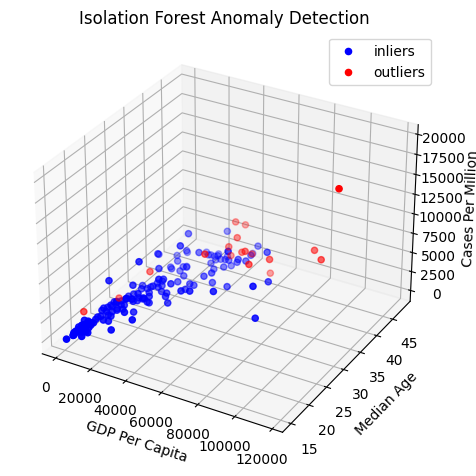

In [21]:
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel('Cases Per Million')
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Median Age')
ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, label="inliers", c="blue")
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, label="outliers", c="red")
ax.legend()
plt.tight_layout()
plt.show()